<a href="https://colab.research.google.com/github/mtsilimos/Codesnippets_Sentence-Embeddings-for-the-Classification-of-Explicit-Fine-grained-Discourse-Relations/blob/main/Bi_LSTMmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')

df['text'].head()

<ipython-input-71-e599d8470047>:3: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df = pd.read_csv('/content/drive/My Drive/finalcorpus.csv', ';', encoding= 'unicode_escape')


0    Once she asked for daddy, but went back to sle...
1    The medication they were giving her to clear u...
2        You can sit up, but you have to stay in there
3    She met his gaze defiantly for a moment longer...
4    If it's something we simply can't afford, that...
Name: text, dtype: object

In [72]:

X = df['text']
y = df['label']

In [73]:
vocab_size= 20000
from tensorflow.keras.preprocessing.text import one_hot
encoding = [one_hot(d,vocab_size) for d in df['text']]

In [74]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
emb_doc = pad_sequences(encoding,padding='pre',maxlen=50)

In [75]:

import numpy as np
final_x = np.array(emb_doc)
final_y = np.array(y)

In [76]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Embedding(vocab_size, output_dim=32, input_length=50))
model.add(Bidirectional(LSTM(20)))
model.add(Dense(6,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 32)            640000    
                                                                 
 bidirectional_1 (Bidirecti  (None, 40)                8480      
 onal)                                                           
                                                                 
 dense_19 (Dense)            (None, 6)                 246       
                                                                 
 dense_20 (Dense)            (None, 4)                 28        
                                                                 
 dense_21 (Dense)            (None, 1)                 5         
                                                                 
Total params: 648759 (2.47 MB)
Trainable params: 648759 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_x, final_y, test_size=0.20, random_state=42)
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), shuffle =  True, epochs=10, batch_size=64)

Epoch 1/10
25/25 [==============================] - 10s 206ms/step - loss: 0.6894 - accuracy: 0.5694 - val_loss: 0.6819 - val_accuracy: 0.5675
Epoch 2/10
25/25 [==============================] - 2s 89ms/step - loss: 0.6548 - accuracy: 0.6837 - val_loss: 0.6110 - val_accuracy: 0.7200
Epoch 3/10
25/25 [==============================] - 2s 82ms/step - loss: 0.5089 - accuracy: 0.8556 - val_loss: 0.4627 - val_accuracy: 0.8650
Epoch 4/10
25/25 [==============================] - 1s 50ms/step - loss: 0.3383 - accuracy: 0.9544 - val_loss: 0.3681 - val_accuracy: 0.8875
Epoch 5/10
25/25 [==============================] - 1s 36ms/step - loss: 0.2118 - accuracy: 0.9819 - val_loss: 0.3780 - val_accuracy: 0.8625
Epoch 6/10
25/25 [==============================] - 1s 40ms/step - loss: 0.1197 - accuracy: 0.9906 - val_loss: 0.4172 - val_accuracy: 0.8625
Epoch 7/10
25/25 [==============================] - 1s 26ms/step - loss: 0.0668 - accuracy: 0.9937 - val_loss: 0.3112 - val_accuracy: 0.8800
Epoch 8/10


In [78]:
model.evaluate(x_test, y_test)

13/13 [==============================] - 0s 6ms/step - loss: 0.4268 - accuracy: 0.8700


[0.42675402760505676, 0.8700000047683716]

In [79]:

model.evaluate(x_train, y_train)

50/50 [==============================] - 0s 5ms/step - loss: 0.0202 - accuracy: 0.9975


[0.020169250667095184, 0.9975000023841858]

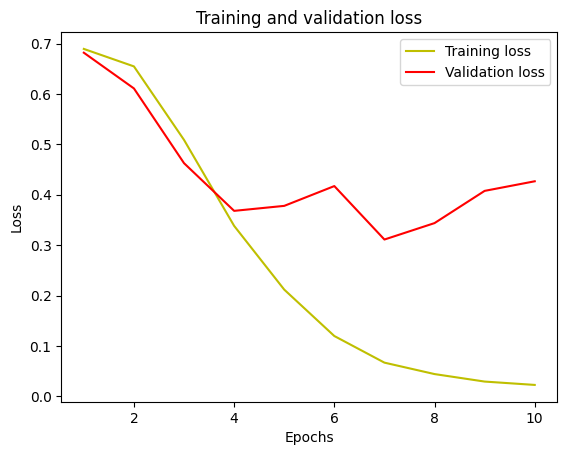

In [80]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

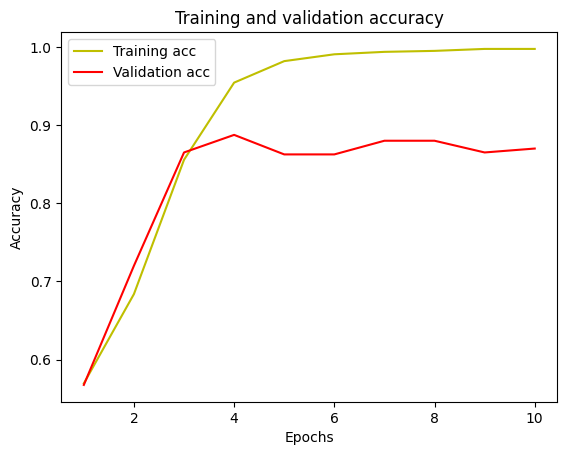

In [81]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()